In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
df = data[['sepal_length', 'sepal_width']] #taking only 2 columns of intrest

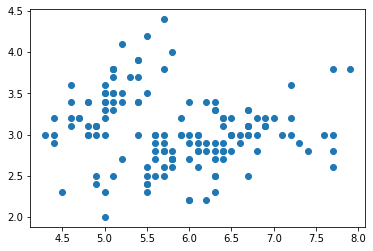

In [5]:
#plot

plt.scatter(df['sepal_length'], df['sepal_width']) #plot length on x axis and width on y axis

In [6]:
#use knn to identify outliers

X = df.values #load in data as X
nbrs = NearestNeighbors(n_neighbors=3)
nbrs.fit(X) #fit model with X data

NearestNeighbors(n_neighbors=3)

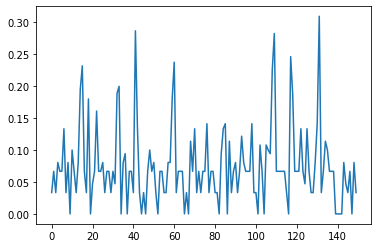

In [9]:
#calculate distances and indexes for the k neighbors
distances, indexes = nbrs.kneighbors(X)
plt.plot(distances.mean(axis=1)) #shows mean disatnce from k-neighbours

In [11]:
#points above 0.15 are considered anomalies

#filter out anomalies
outlier_index = np.where(distances.mean(axis=1) >0.15)
outlier_index

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131]),)

In [12]:
#find value of these outliers
outlier_values = df.iloc[outlier_index] #select values only labled as outliers
outlier_values

,sepal_length,sepal_width
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


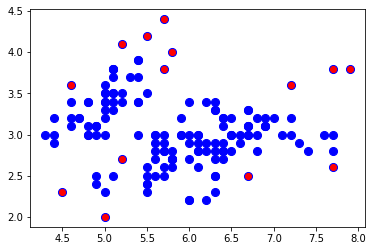

In [15]:
#highlight outlier data and plot them
plt.scatter(df['sepal_length'], df['sepal_width'], color = 'b', s=65)
plt.scatter(outlier_values['sepal_length'], outlier_values['sepal_width'], color='r')